In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
import mubind as mb
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'

import os
import numpy as np
import pandas as pd
import torch

import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker
import timeit

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [8]:
data = bd.bindome.datasets.SELEX.get_data(accession='cardiac_complexes')
# data[data['cycle'] == 'AF']

data = data[~data['filename'].str.endswith('.xlsx')]
metadata = pd.read_excel(os.path.join(bd.constants.ANNOTATIONS_DIRECTORY, 'selex', 'cardiac_complexes', 'SAMPLE_INFO.xlsx'))
data = data.merge(metadata, on='filename')
data['cycle'] = data['Round']
data['library'] = data['filename'].str.split('.txt.gz').str[0].str.split('_').str[-1]
data = data[['filename', 'cycle', 'tf.name', 'accession', 'library']]

cardiac_complexes
# filenames 22
(22, 2)
PRJEB14744
PRJEB20112
PRJEB3289
PRJEB9797


In [9]:
data.head()

,filename,cycle,tf.name,accession,library
0,GATA4TBX5_R1_R46_016_999.txt.gz,1,GATA4TBX5,cardiac_complexes,999
1,GATA4TBX5_R2_R46_033_999.txt.gz,2,GATA4TBX5,cardiac_complexes,999
2,GATA4TBX5_R3_R46_051_999.txt.gz,3,GATA4TBX5,cardiac_complexes,999
3,GATA4_R1_R46_032_777.txt.gz,1,GATA4,cardiac_complexes,777
4,GATA4_R2_R46_046_777.txt.gz,2,GATA4,cardiac_complexes,777


All TF's, using subsets of only round 0 and 1

In [10]:
def update_dict(d1, d2):
    for k in list(d2.keys()):
        if not k in d1:
            d1[k] = d2[k]
        else:
            d2[k] = d1[k]

In [60]:
reads_tf = {}
reads_zero = {}

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
train.dataset.rounds.sum(axis=0)

array([100, 100, 100, 100])

In [82]:
next_data.shape

(39670, 12)

In [84]:
n_sample

100000

In [85]:
next_data.head(n_sample)

,seq,R46_888,NKX2-5TBX5_R1_R46_067_888,NKX2-5TBX5_R2_R46_084_888,NKX2-5TBX5_R3_R46_019_888,0,1,2,3,sum,batch,is_count_data
32681,TAGTGCGGTGTTTAATATCA,0,0,4,0,0,0,4,0,4,1,1
27128,GGGTAGGGGGGGCTCGAGCG,0,3,0,0,0,3,0,0,3,1,1
20290,CGTGTTCTAGTCGGAGGGAA,0,3,0,0,0,3,0,0,3,1,1
26990,GGGGGGTGGGGCGGCGGGGG,0,3,0,0,0,3,0,0,3,1,1
37462,TTAAATACGCGTCACCTGAG,0,0,3,0,0,0,3,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6596,NCCTCGTCTGAGTATCTGAA,1,0,0,0,1,0,0,0,0,1,1
6595,NAAGTGTACTACTTTACTAT,1,0,0,0,1,0,0,0,0,1,1
6594,NGTAACTGGAATGAAGTTAC,1,0,0,0,1,0,0,0,0,1,1
6593,NGGTTGGAGGGGAGTGAGGG,1,0,0,0,1,0,0,0,0,1,1


NKX2-5TBX5
NKX2-5TBX5 888
3 2
1 out of (2, 5) R46_888.txt.gz ../annotations/selex/cardiac_complexes/R46_888.txt.gz
../annotations/selex/cardiac_complexes/R46_888.txt.gz n_sample=10000 is.fastq=False
2 out of (2, 5) R46_888.txt.gz ../annotations/selex/cardiac_complexes/R46_888.txt.gz
../annotations/selex/cardiac_complexes/R46_888.txt.gz n_sample=10000 is.fastq=False
3
Loading dataset # features = 39670
(10000, 12)
Loading time: (s) 0.079261
# rounds 3
# batches 1
# enr_series True
next w 16 <class 'int'>

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


before kernel optimization.


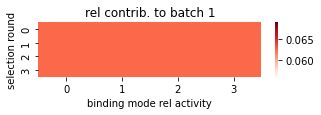


#activities
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0., 0., 0.]], device='cuda:0', requires_grad=True)


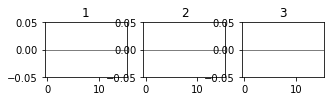

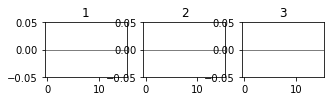

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.600038 , best epoch: 95 secs per epoch: 0.417 s
Epoch: 201, Loss: 0.600082 , best epoch: 155 secs per epoch: 0.392 s
Epoch: 301, Loss: 0.600133 , best epoch: 255 secs per epoch: 0.372 s
Epoch: 401, Loss: 0.600157 , best epoch: 367 secs per epoch: 0.355 s
Epoch: 501, Loss: 0.600032 , best epoch: 470 secs per epoch: 0.354 s
Epoch: 601, Loss: 0.600050 , best epoch: 470 secs per epoch: 0.368 s
Epoch: 621, Loss: 0.6001 , best epoch: 470 secs per epoch: 0.369 s
early stop!
total time: 228.701 s
secs per epoch: 0.369 s

##After kernel opt / before shift optim.


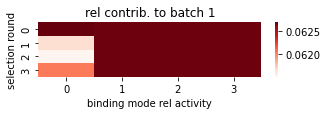


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.9156,  2.6310, -2.6269, -7.9196]], device='cuda:0',
       requires_grad=True)


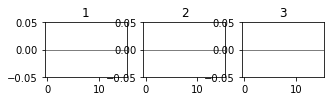

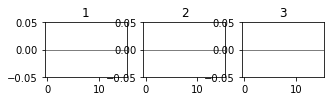

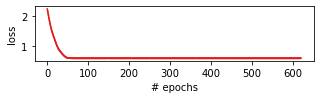

after shift optimz model


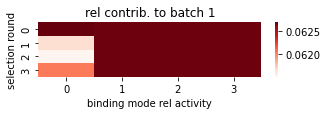


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.9156,  2.6310, -2.6269, -7.9196]], device='cuda:0',
       requires_grad=True)


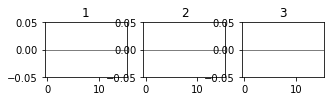

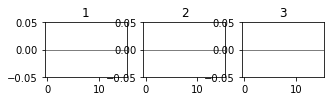

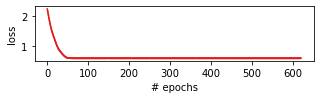



Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


before kernel optimization.


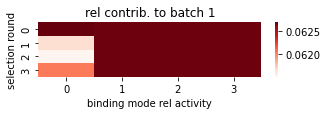


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.9156,  2.6310, -2.6269, -7.9196]], device='cuda:0',
       requires_grad=True)


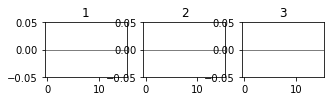

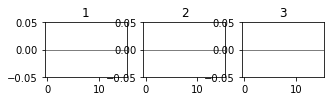

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599993 , best epoch: 1 secs per epoch: 0.417 s
Epoch: 152, Loss: 0.6000 , best epoch: 1 secs per epoch: 0.420 s
early stop!
total time: 63.435 s
secs per epoch: 0.420 s

##After kernel opt / before shift optim.


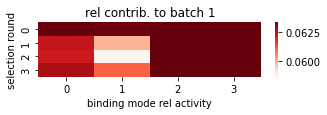


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [0.9993112  0.9467625  0.92626375 0.9650408 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.6351,  2.5355, -2.5514, -7.6701]], device='cuda:0',
       requires_grad=True)


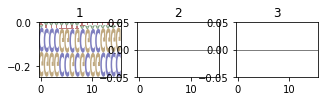

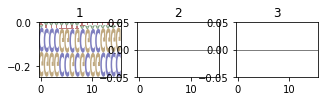

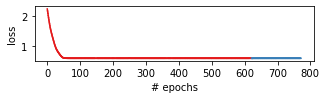


optimize_motif_shift (first)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599833 , best epoch: 0 secs per epoch: 0.365 s
Epoch: 151, Loss: 0.6000 , best epoch: 0 secs per epoch: 0.358 s
early stop!
total time: 53.655 s
secs per epoch: 0.358 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0005742  0.8288261  0.7780614  0.8124362 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.3340,  2.4602, -2.4431, -7.3509]], device='cuda:0',
       requires_grad=True)


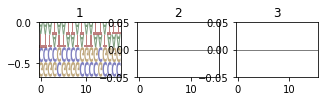

next expand left: 1, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599880 , best epoch: 0 secs per epoch: 0.388 s
Epoch: 151, Loss: 0.5998 , best epoch: 0 secs per epoch: 0.383 s
early stop!
total time: 57.383 s
secs per epoch: 0.383 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [0.9994321  0.8544145  0.7941409  0.8338195 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.3293,  2.4528, -2.4447, -7.3379]], device='cuda:0',
       requires_grad=True)


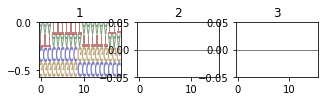

next expand left: 2, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599893 , best epoch: 0 secs per epoch: 0.382 s
Epoch: 151, Loss: 0.6000 , best epoch: 0 secs per epoch: 0.376 s
early stop!
total time: 56.367 s
secs per epoch: 0.376 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [0.99999917 0.8326364  0.8023944  0.8288846 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.3459,  2.4311, -2.4189, -7.3580]], device='cuda:0',
       requires_grad=True)


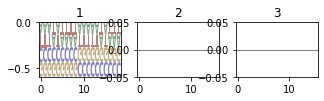

next expand left: 2, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599899 , best epoch: 0 secs per epoch: 0.416 s
Epoch: 151, Loss: 0.5997 , best epoch: 0 secs per epoch: 0.390 s
early stop!
total time: 58.493 s
secs per epoch: 0.390 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0000024  0.8454228  0.81197315 0.855799  ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.3416,  2.4458, -2.4382, -7.3497]], device='cuda:0',
       requires_grad=True)


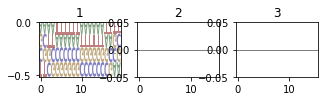

sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.598632
1            1             1      0  0.598780
2            2             2      0  0.598797
3            2             1      0  0.598824
4            1             2      0  0.598839
action: (0, 0, 0)


optimize_motif_shift (first)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.598632
action: (0, 0, 0)

after shift optimz model


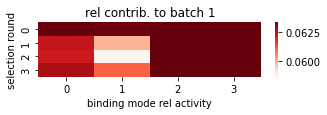


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [0.9993112  0.9467625  0.92626375 0.9650408 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.6351,  2.5355, -2.5514, -7.6701]], device='cuda:0',
       requires_grad=True)


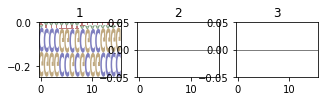

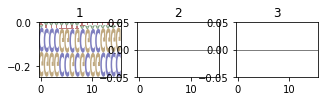

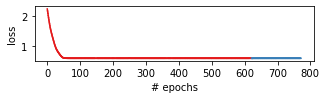




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599878 , best epoch: 0 secs per epoch: 0.341 s
Epoch: 151, Loss: 0.5999 , best epoch: 0 secs per epoch: 0.341 s
early stop!
total time: 51.145 s
secs per epoch: 0.341 s

##final motif signal (after final refinement)


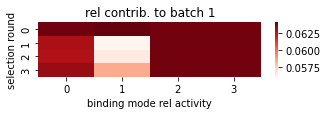


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.5179,  2.4826, -2.5286, -7.5596]], device='cuda:0',
       requires_grad=True)


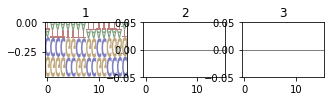

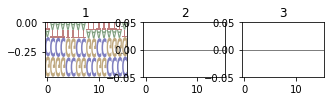


Kernel to optimize 2

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 1
setting grad status of kernel at 3 to 0


before kernel optimization.


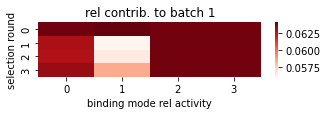


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 7.5179,  2.4826, -2.5286, -7.5596]], device='cuda:0',
       requires_grad=True)


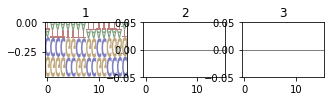

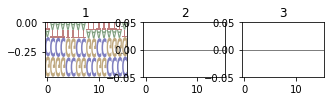

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599411 , best epoch: 4 secs per epoch: 0.343 s
Epoch: 155, Loss: 0.5993 , best epoch: 4 secs per epoch: 0.345 s
early stop!
total time: 53.124 s
secs per epoch: 0.345 s

##After kernel opt / before shift optim.


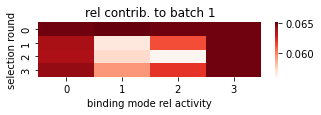


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.9999997  0.9446467  0.86388904 0.95465684]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.7961,  2.2198, -2.2686, -6.8612]], device='cuda:0',
       requires_grad=True)


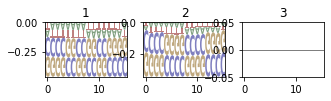

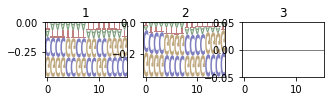

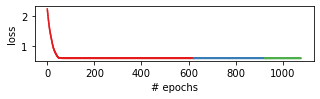


optimize_motif_shift (first)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599307 , best epoch: 0 secs per epoch: 0.325 s
Epoch: 151, Loss: 0.5992 , best epoch: 0 secs per epoch: 0.322 s
early stop!
total time: 48.345 s
secs per epoch: 0.322 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99933916 0.81454897 0.7765818  0.82037216]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.5484,  2.1682, -2.1641, -6.5531]], device='cuda:0',
       requires_grad=True)


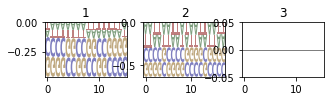

next expand left: 1, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599520 , best epoch: 0 secs per epoch: 0.336 s
Epoch: 151, Loss: 0.5992 , best epoch: 0 secs per epoch: 0.335 s
early stop!
total time: 50.293 s
secs per epoch: 0.335 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.9999984  0.8291368  0.77422255 0.82471895]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.5353,  2.1781, -2.1751, -6.5391]], device='cuda:0',
       requires_grad=True)


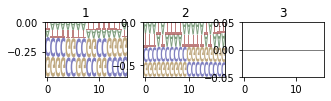

next expand left: 2, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599398 , best epoch: 0 secs per epoch: 0.349 s
Epoch: 151, Loss: 0.5994 , best epoch: 0 secs per epoch: 0.345 s
early stop!
total time: 51.754 s
secs per epoch: 0.345 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99999875 0.81321913 0.7688995  0.82271105]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.5354,  2.1772, -2.1747, -6.5382]], device='cuda:0',
       requires_grad=True)


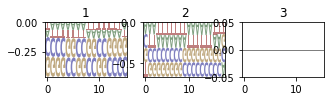

next expand left: 2, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599277 , best epoch: 0 secs per epoch: 0.346 s
Epoch: 151, Loss: 0.5995 , best epoch: 0 secs per epoch: 0.342 s
early stop!
total time: 51.308 s
secs per epoch: 0.342 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99974525 0.8149337  0.77616864 0.8121063 ]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.5320,  2.1724, -2.1603, -6.5443]], device='cuda:0',
       requires_grad=True)


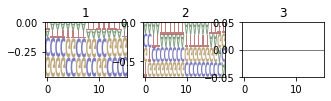

sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.598154
1            2             2      0  0.598445
2            1             1      0  0.598452
3            2             1      0  0.598547
4            1             2      0  0.598587
action: (0, 0, 0)


optimize_motif_shift (first)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.598154
action: (0, 0, 0)

after shift optimz model


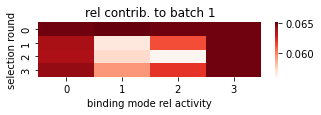


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.9999997  0.9446467  0.86388904 0.95465684]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.7961,  2.2198, -2.2686, -6.8612]], device='cuda:0',
       requires_grad=True)


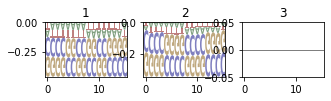

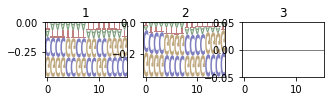

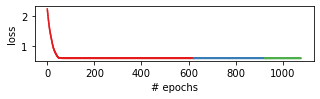




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.599241 , best epoch: 0 secs per epoch: 0.335 s
Epoch: 151, Loss: 0.5995 , best epoch: 0 secs per epoch: 0.334 s
early stop!
total time: 50.043 s
secs per epoch: 0.334 s

##final motif signal (after final refinement)


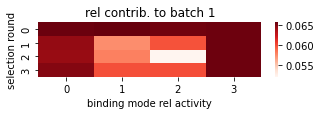


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.6555,  2.1875, -2.2478, -6.7134]], device='cuda:0',
       requires_grad=True)


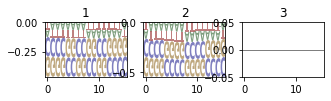

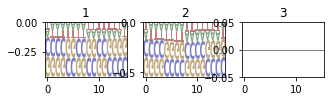


Kernel to optimize 3

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 1


before kernel optimization.


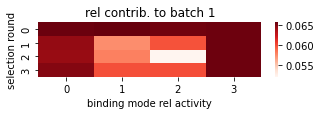


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.         1.         1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 6.6555,  2.1875, -2.2478, -6.7134]], device='cuda:0',
       requires_grad=True)


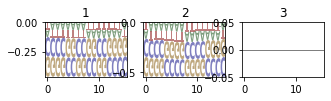

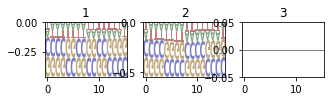

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.598065 , best epoch: 13 secs per epoch: 0.336 s
Epoch: 164, Loss: 0.5981 , best epoch: 13 secs per epoch: 0.334 s
early stop!
total time: 54.470 s
secs per epoch: 0.334 s

##After kernel opt / before shift optim.


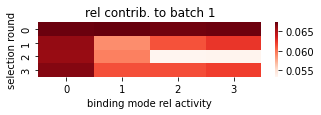


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.0000011  0.92832965 0.7956837  0.922784  ]]]

#log_etas
Parameter containing:
tensor([[ 4.8160,  1.5500, -1.6023, -4.8922]], device='cuda:0',
       requires_grad=True)


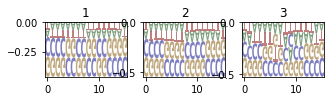

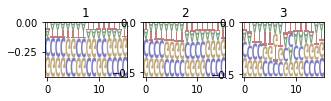

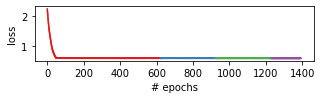


optimize_motif_shift (first)...
next expand left: 1, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.598121 , best epoch: 4 secs per epoch: 0.321 s
Epoch: 155, Loss: 0.5981 , best epoch: 4 secs per epoch: 0.326 s
early stop!
total time: 50.167 s
secs per epoch: 0.326 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [0.99981517 0.7640382  0.7118607  0.7813647 ]]]

#log_etas
Parameter containing:
tensor([[ 4.3660,  1.4376, -1.4099, -4.3941]], device='cuda:0',
       requires_grad=True)


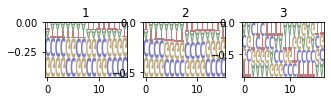

next expand left: 1, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.598086 , best epoch: 0 secs per epoch: 0.339 s
Epoch: 151, Loss: 0.5982 , best epoch: 0 secs per epoch: 0.339 s
early stop!
total time: 50.814 s
secs per epoch: 0.339 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.0000002  0.77172923 0.7208341  0.79688394]]]

#log_etas
Parameter containing:
tensor([[ 4.3675,  1.4406, -1.4264, -4.3823]], device='cuda:0',
       requires_grad=True)


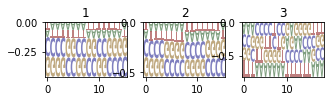

next expand left: 2, next expand right: 1, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.598179 , best epoch: 2 secs per epoch: 0.341 s
Epoch: 153, Loss: 0.5981 , best epoch: 2 secs per epoch: 0.340 s
early stop!
total time: 51.742 s
secs per epoch: 0.340 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.0000708  0.78072405 0.7276034  0.8049067 ]]]

#log_etas
Parameter containing:
tensor([[ 4.3687,  1.4390, -1.4286, -4.3793]], device='cuda:0',
       requires_grad=True)


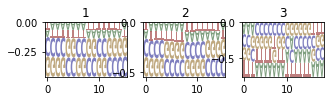

next expand left: 2, next expand right: 2, shift: 0
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.598124 , best epoch: 4 secs per epoch: 0.340 s
Epoch: 155, Loss: 0.5980 , best epoch: 4 secs per epoch: 0.343 s
early stop!
total time: 52.857 s
secs per epoch: 0.343 s
after opt.

#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.000182   0.7951752  0.7421291  0.8192542 ]]]

#log_etas
Parameter containing:
tensor([[ 4.3587,  1.4439, -1.4279, -4.3748]], device='cuda:0',
       requires_grad=True)


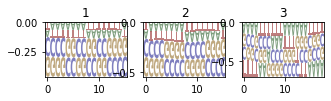

sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.597691
1            2             1      0  0.597743
2            1             1      0  0.597787
3            1             2      0  0.597796
4            2             2      0  0.597849
action: (0, 0, 0)


optimize_motif_shift (first)...
sorted
   expand.left  expand.right  shift      loss
0            0             0      0  0.597691
action: (0, 0, 0)

after shift optimz model


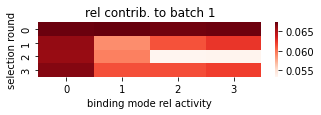


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.0000011  0.92832965 0.7956837  0.922784  ]]]

#log_etas
Parameter containing:
tensor([[ 4.8160,  1.5500, -1.6023, -4.8922]], device='cuda:0',
       requires_grad=True)


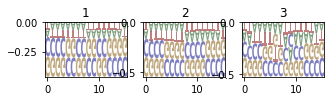

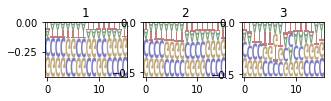

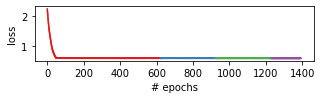




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 
kernel grad (3) = 1 

kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 1000 early_stopping 150
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 101, Loss: 0.598129 , best epoch: 89 secs per epoch: 0.321 s
Epoch: 201, Loss: 0.598058 , best epoch: 89 secs per epoch: 0.325 s
Epoch: 240, Loss: 0.5981 , best epoch: 89 secs per epoch: 0.327 s
early stop!
total time: 78.199 s
secs per epoch: 0.327 s

##final motif signal (after final refinement)


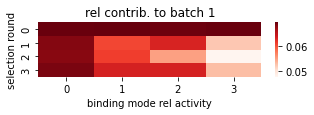


#activities
[[[1.0002587  0.98386246 0.9814529  0.9899707 ]
  [1.0027065  0.8754037  0.88355255 0.9133949 ]
  [0.99813074 0.9116938  0.7933991  0.91409117]
  [1.0003568  0.75489974 0.68898326 0.7641674 ]]]

#log_etas
Parameter containing:
tensor([[ 4.3703,  1.4530, -1.4226, -4.4024]], device='cuda:0',
       requires_grad=True)


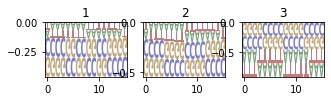

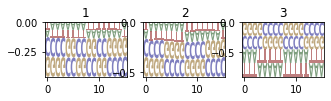

TypeError: 'float' object is not iterable

In [90]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

num_epochs = 500
early_stopping = 15
log_each = 25
res = []
model_by_k = {}

n_sample = 10000

for tf in set(data['tf.name']):
    if 'ZERO' in tf:
        continue
    if tf != 'NKX2-5TBX5':
        continue
    print(tf)
    
    for library, grp in data.groupby('library'):
        if library != '888':
            continue
        print(tf, library)
        
        reads_tf_next, reads_zero_next = mb.bindome.datasets.SELEX.load_tf_and_zero_reads(tf, data, library=library,
                                                                                          is_fastq=False, n_sample=n_sample,
                                                                                          k_skip=reads_tf.keys())
        
        # update main object to skip reading again in future iterations
        update_dict(reads_tf, reads_tf_next)
        update_dict(reads_zero, reads_zero_next)
        
        for k_r0 in reads_zero_next:

            k_model = tf + ':' + k_r0
            # print(k_r0, k_tf, k_model)

            n_rounds = len(reads_tf_next.keys())
            print(n_rounds)
            
            # combine all the positive round data
            df2 = []
            for k in reads_tf_next.keys():
                df = reads_tf_next[k]
                df['k'] = k
                df2.append(df)
            df = pd.concat(df2)
            df = df.pivot('seq', 'k', 'counts').fillna(0).reset_index()
            seqlen = list(df['seq'].str.len())[0]
            
            next_data = reads_zero_next[k_r0].merge(df, on='seq', how='outer').fillna(0) # .astype(int)
            
            new_cols = ['seq', k_r0] + list(df.columns[1:])
            next_data.columns = new_cols
            for i, k in enumerate(next_data.columns[1:]):
                next_data[k] = next_data[k].astype(int)
                next_data[i] = next_data[k].astype(int)
                
            next_data['sum'] = next_data[[i for i in range(1, n_rounds + 1)]].sum(axis=1).values
            next_data = next_data.sort_values('sum', ascending=False)
            
            next_data['batch'] = 1
            next_data['is_count_data'] = 1
            

            print('Loading dataset # features =', next_data.shape[0])
            start = timeit.default_timer()
            # next_data = next_data.head(n_sample).reset_index(drop=True)
            
            if n_sample is not None:
                next_data = next_data.sample(n_sample).reset_index(drop=True)
            
            print(next_data.shape)
            # assert False
            
            labels = [i for i in range(n_rounds + 1)]
            dataset = mb.datasets.SelexDataset(next_data, n_rounds=n_rounds,
                                               single_encoding_step=True, labels=labels)
            stop = timeit.default_timer()
            print('Loading time: (s)', '%.6f' % (stop - start))

            train = tdata.DataLoader(dataset=dataset, batch_size=512, shuffle=True)
            model_by_k_next, res_next = mb.tl.train_iterative(train, device, w=16, max_w=20, log_each=100, num_epochs=1000, early_stopping=150)                
            update_dict(model_by_k, {k_model: model_by_k_next})
            res += res_next
            print('done')

In [ ]:
mb.pl.kmer_enrichment(model_by_k_next, train)